#*PROYECTO DE INTELIGENCIA ARTIFICIAL*



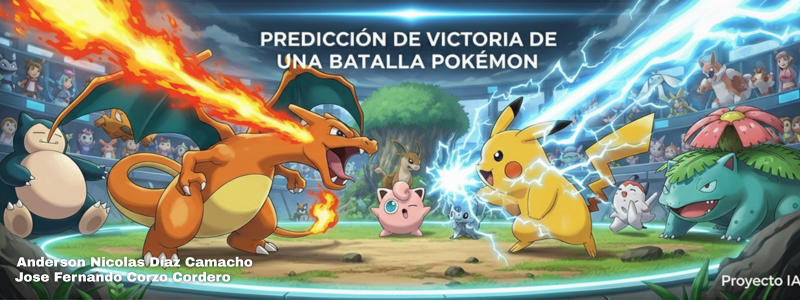

###**Autores:**

 * Anderson Nicolas Díaz Camacho - 2214105
 * Jose Fernando Corzo Cordero -2224641



##**Objetivo:**

Analizar y predecir la victoria en una batalla Pokémon utilizando datos estadísticos de los Pokémon.


------

##**Dataset:**

Para la realización del proyecto se utilizó el dataset <a href="https://www.kaggle.com/datasets/abcsds/pokemon">Pokémon with stats</a>, el cual contiene información detallada de los diferentes Pokémon de las primeras seis generaciones, incluyendo sus estadísticas base, tipos, generación y si son legendarios o no.

Los datos provienen de la comunidad de Kaggle y han sido recopilados con fines de análisis y práctica en ciencia de datos. En la página oficial del dataset se pueden encontrar más detalles, así como enlaces para su descarga y utilización libre en proyectos académicos y personales, siempre y cuando se acredite la fuente.

**El dataset originalmente cuenta con:**

13 columnas de datos

800 registros

--------


##**Descripción del dataset**

El dataset contiene información de 800 Pokémon correspondientes a las primeras seis generaciones. Este conjunto de datos es especialmente útil para realizar análisis comparativos entre Pokémon, identificar patrones de diseño en las diferentes generaciones y estudiar cómo las estadísticas influyen en el desempeño durante batallas. Además, permite aplicar técnicas de análisis de datos.

Cada fila representa un Pokémon y cada columna aporta un atributo o característica específica:



(#) identificador del Pokémon dentro de la Pokédex Nacional.

Name → Nombre del Pokémon.

Type 1 → Tipo principal del Pokémon (por ejemplo: Fire, Water, Grass).

Type 2 → Tipo secundario del Pokémon (si aplica). Algunos Pokémon solo tienen un tipo, por lo que este valor puede estar vacío.

Total → Suma total de los puntos base de estadísticas del Pokémon. Se obtiene sumando HP, Attack, Defense, Sp. Atk, Sp. Def y Speed.

HP → “Hit Points”, la cantidad de puntos de salud que tiene el Pokémon. Indica cuánto daño puede recibir antes de debilitarse.

Attack → Fuerza de los ataques físicos del Pokémon.

Defense → Capacidad defensiva frente a ataques físicos.

Sp. Atk → “Special Attack”, potencia de los ataques especiales (no físicos).

Sp. Def → “Special Defense”, resistencia frente a ataques especiales.

Speed → Velocidad del Pokémon. Determina qué Pokémon ataca primero en un combate.

Generation → Generación a la que pertenece el Pokémon (del 1 al 6 en este dataset).

Legendary → Variable booleana (True/False) que indica si el Pokémon es legendario.

----

##**Ejecutar los comandos Shape, Columns, Head**

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Pokemon.csv")

# Mostrar Shape
print("===== SHAPE DEL DATASET =====")
print(df.shape)
print("\n")

# Mostrar Columnas
print("===== COLUMNAS DEL DATASET =====")
print(df.columns.tolist())
print("\n")

# Mostrar Head
print("===== PRIMERAS 5 FILAS =====")
print(df.head())

===== SHAPE DEL DATASET =====
(800, 13)


===== COLUMNAS DEL DATASET =====
['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


===== PRIMERAS 5 FILAS =====
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [ ]:
##display(df)

-----

##**Limpieza del dataset**

Con el objetivo de realizar un análisis más limpio y enfocado en las variables numéricas y categóricas de interés, se decidió aplicar una fase de limpieza del dataset.

En esta etapa, se eliminaron algunas columnas que no aportaban valor significativo al análisis:

(#): Es únicamente un identificador (Pokédex number), no contribuye a patrones estadísticos relevantes.

Name: Contiene nombres únicos para cada Pokémon, por lo que no presenta repeticiones útiles para el análisis.

Type 2: Una gran parte de los registros presenta valores vacíos (NaN), lo que introduce ruido en el análisis.

Legendary: Aunque indica si un Pokémon es legendario o no, en este caso se decidió excluirla debido a que no era central en los objetivos del análisis.

Con esta limpieza, el dataset queda reducido a las variables más útiles para el estudio, facilitando la interpretación de resultados y evitando sesgos por información redundante o incompleta.

In [ ]:
# Eliminar columnas innecesarias
df_clean = df.drop(columns=["#", "Name", "Type 2", "Legendary"])

# Verificar los cambios
print("Columnas restantes después de la limpieza:")
print(df_clean.columns)
print("\nPrimeras filas del dataset limpio:")
print(df_clean.head())

Columnas restantes después de la limpieza:
Index(['Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation'],
      dtype='object')

Primeras filas del dataset limpio:
  Type 1  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0  Grass    318  45      49       49       65       65     45           1
1  Grass    405  60      62       63       80       80     60           1
2  Grass    525  80      82       83      100      100     80           1
3  Grass    625  80     100      123      122      120     80           1
4   Fire    309  39      52       43       60       50     65           1


---

##**Grafica de nuestras columnas**

Para explorar de manera visual el dataset limpio, se realizó un proceso de graficación de cada una de las columnas. La estrategia utilizada fue la siguiente:

Variables numéricas con valores reales (continuas): se emplearon gráficos de líneas (plot) para observar tendencias y distribuciones generales.

Variables numéricas con valores enteros (discretas): se representaron con gráficos circulares (pie chart) para mostrar la proporción de frecuencias de cada categoría numérica.

Variables categóricas de tipo texto: igualmente se utilizaron pie charts para ilustrar la distribución de las categorías.

De esta forma, cada variable es visualizada con la representación gráfica que mejor se ajusta a su naturaleza, permitiendo una interpretación más clara de los datos.


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("Pokemon.csv")

#Eliminar las columnas que no necesitamos
df_clean = df.drop(columns=["#", "Name", "Type 2", "Legendary"])

#Iterar sobre las columnas
for col in df_clean.columns:
    if df_clean[col].dtype == "object":
        #(texto) → Pie chart
        fig = px.pie(df_clean, names=col, title=f"Distribución de {col}")
        fig.show()

    elif df_clean[col].dtype in ["int64", "int32"]:
        #(Numerico) Pie chart
        counts = df_clean[col].value_counts()
        fig = px.pie(values=counts.values, names=counts.index,
                     title=f"Distribución de {col} (valores enteros)")
        fig.show()

    elif df_clean[col].dtype in ["float64", "float32"]:
        #Line plot
        fig = px.line(df_clean, y=col, title=f"Evolución de {col}")
        fig.show()


---

##**Prueba quitando valores no tan comunes**

Agregando una nueva fila que recoge los valores que están por fuera del top 10 valores más repetidos.

In [ ]:
import plotly.express as px

for col in df_clean.columns:
    if df_clean[col].dtype == "object":
        counts = df_clean[col].value_counts()
        top10 = counts[:10]
        otros = counts[10:].sum()
        if otros > 0:
            top10["Otros"] = otros
        fig = px.pie(values=top10.values, names=top10.index,
                     title=f"Distribución de {col} (Top 10 + Otros)")
        fig.show()

    elif df_clean[col].dtype in ["int64", "int32"]:
        counts = df_clean[col].value_counts()
        top10 = counts[:10]
        otros = counts[10:].sum()
        if otros > 0:
            top10["Otros"] = otros
        fig = px.pie(values=top10.values, names=top10.index,
                     title=f"Distribución de {col} (Top 10 + Otros)")
        fig.show()

    elif df_clean[col].dtype in ["float64", "float32"]:
        fig = px.line(df_clean, y=col, title=f"Evolución de {col}")
        fig.update_traces(line=dict(width=2))
        fig.show()

---

### Comparación entre los tipos de pokémon

Realizaremos unos boxplots para cada estadística para ver cómo se diferencian los distintos tipos de pokémon.

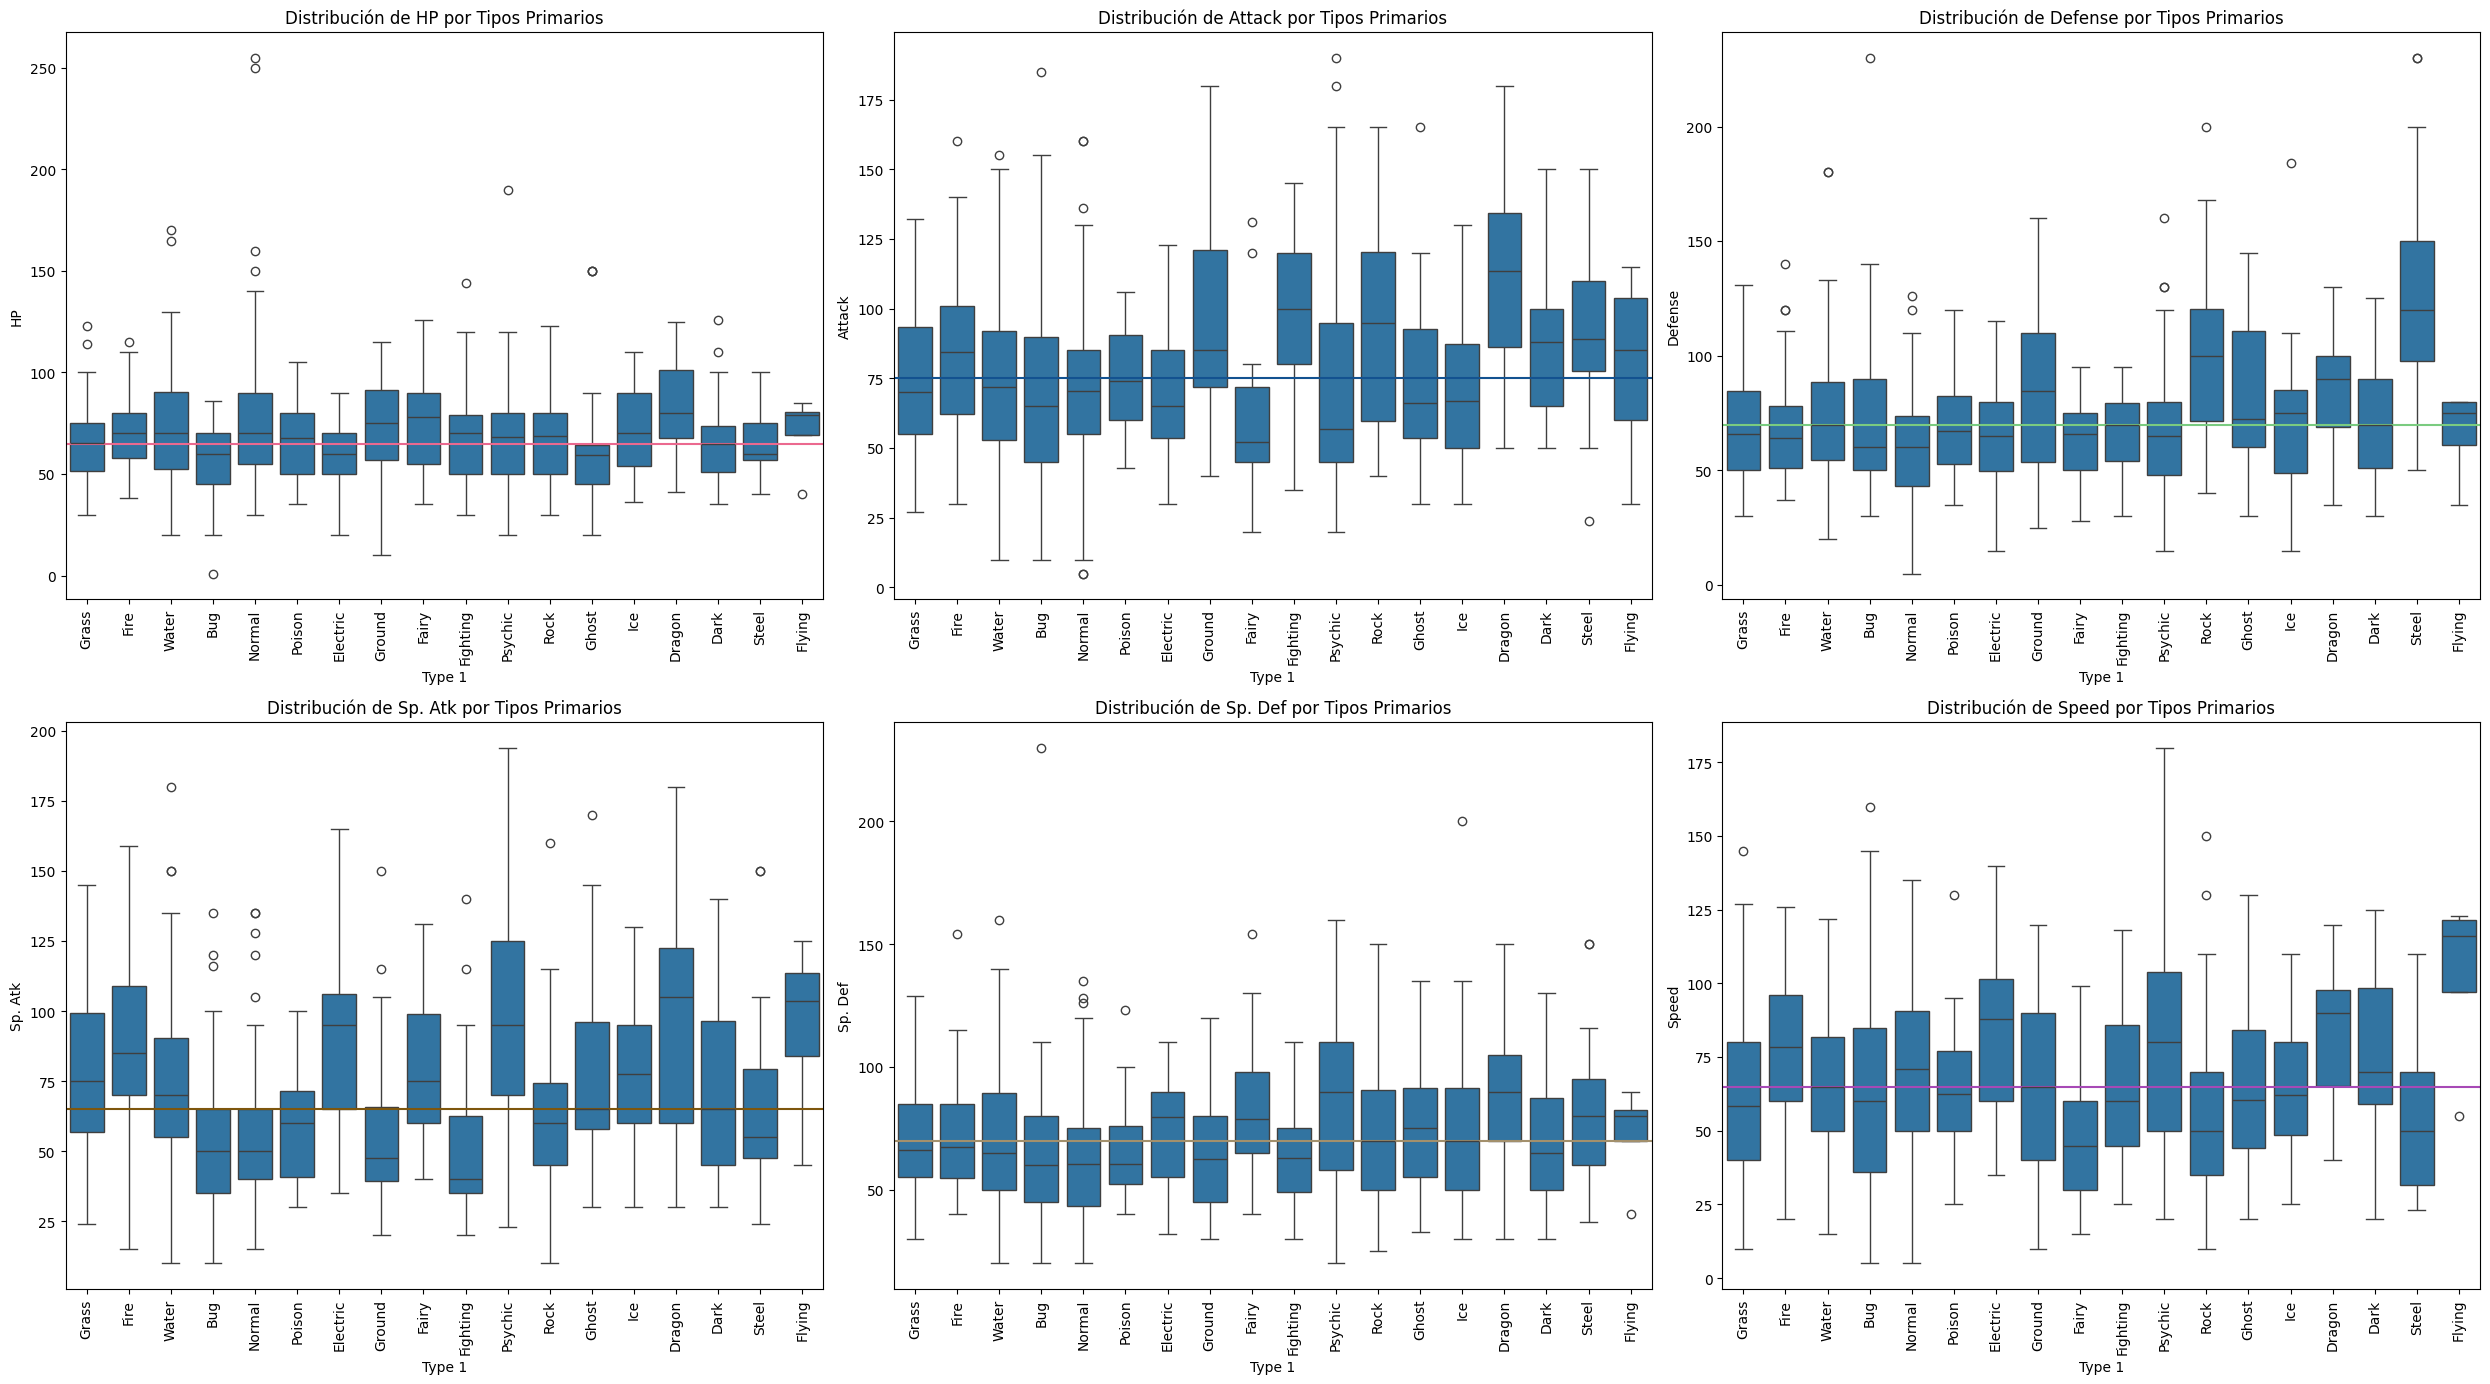

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas numéricas
stats = pokemon.columns[5:11]

plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    titulo = f"Distribución de {stat} por Tipos Primarios"
    plt.subplot(3, 3, ii + 1)
    plt.title(titulo)
    plt.xticks(rotation=90)

    sns.boxplot(x='Type 1', y=stat, data=pokemon)

    # Línea horizontal en la mediana del estadístico global
    plt.axhline(pokemon[stat].median(), color=np.random.rand(3))

plt.tight_layout()
plt.show()


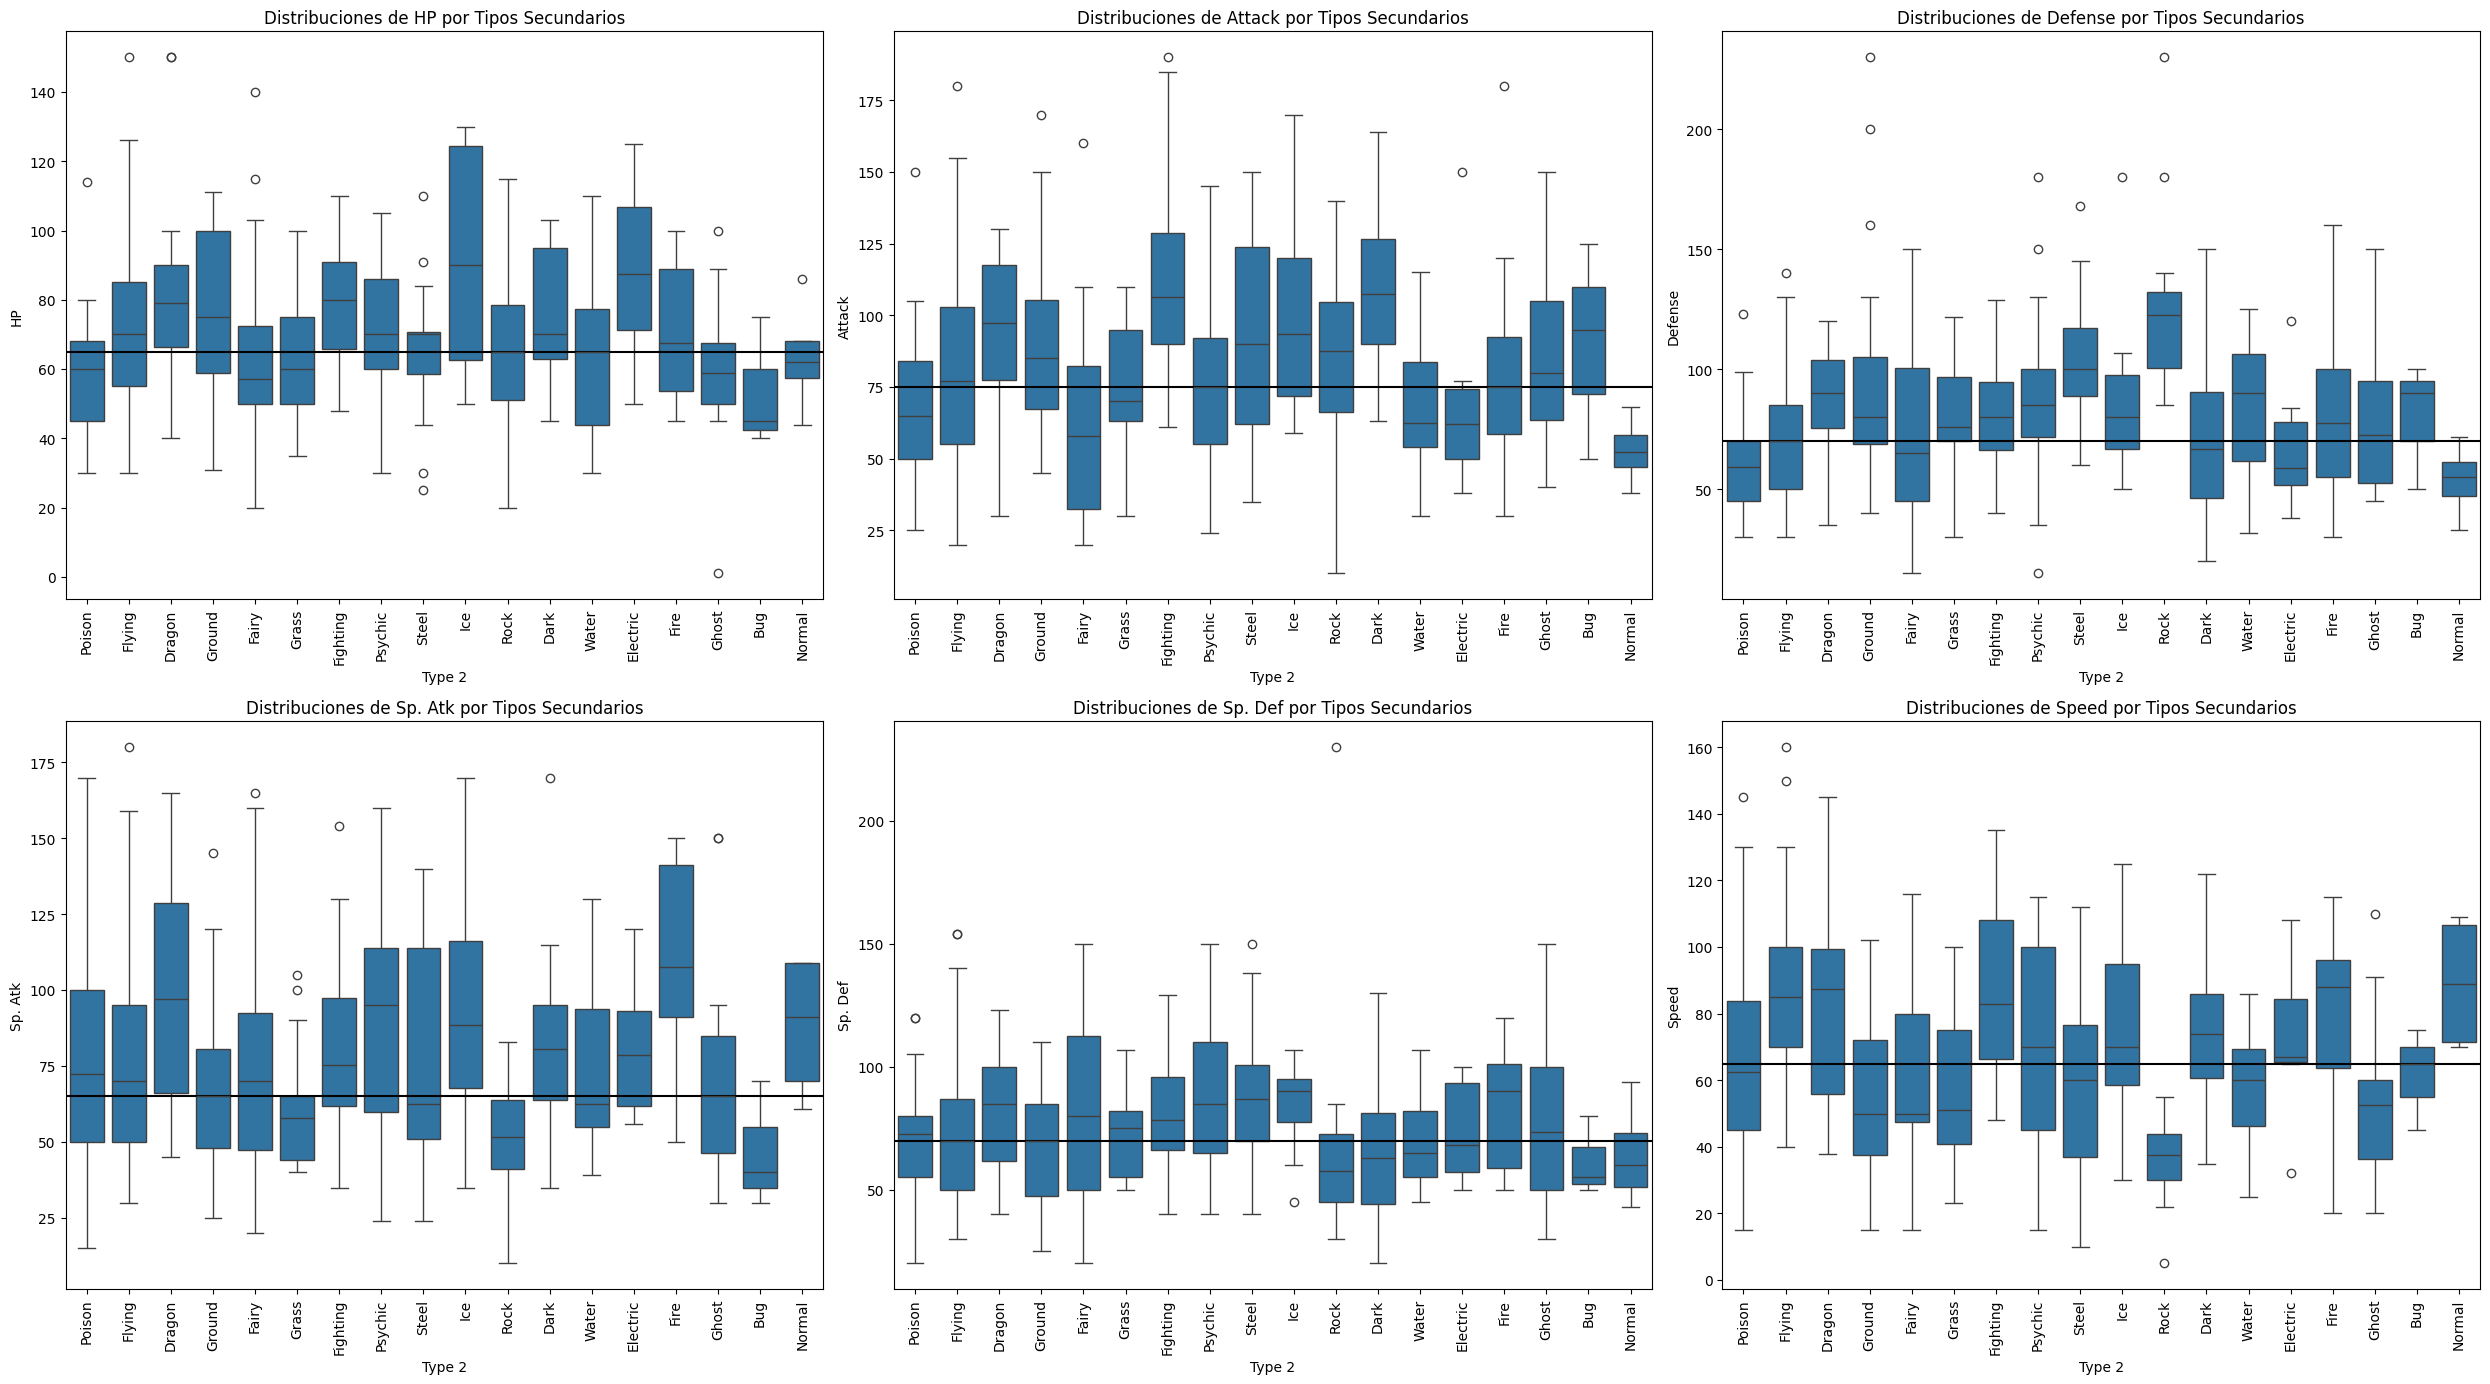

In [ ]:
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    titulo = f"Distribuciones de {stat} por Tipos Secundarios"
    plt.subplot(3, 3, ii + 1)
    plt.title(titulo)
    plt.xticks(rotation=90)

    sns.boxplot(x='Type 2', y=stat, data=pokemon)

    # Línea horizontal en la mediana global
    plt.axhline(pokemon[stat].median(), color='black')

plt.tight_layout()
plt.show()


### Observaciones de las Gráficas

Las distribuciones muestran que las estadísticas base de los Pokémon varían notablemente según su tipo primario.
En general, los tipos Dragon, Psychic y Steel tienden a presentar valores más altos en atributos como Attack, Sp. Atk y Defense, indicando un rendimiento superior promedio en combate.

Por el contrario, tipos como Bug, Normal y Grass presentan medianas más bajas y una menor dispersión, lo que refleja un desempeño más equilibrado o limitado.
Además, se observan múltiples outliers, especialmente en Attack y HP, evidenciando la existencia de Pokémon excepcionales dentro de cada tipo.
En conjunto, estas gráficas permiten identificar diferencias de poder y especialización entre los tipos, mostrando una fuerte relación entre el tipo elemental y el rendimiento estadístico.

In [ ]:
#@title Importar librerías { display-mode: "form" }

import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

import matplotlib.patches as patches
from sklearn.model_selection import train_test_split

pokemon = pd.read_csv("pokemon.csv")
#renombramos la columna "#" por "Number" ya que la necesitaremos luego
pokemon = pokemon.rename(index=str, columns={"#": "Number"})

pokemon.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


---

##**Definición del dataset: Regresión**

El dataset de Pokémon se enmarca dentro de un problema de supervisada, dado que varias de sus columnas representan variables numéricas continuas. Entre ellas se incluyen:

Total: suma total de estadísticas base de cada Pokémon.

HP (Health Points): puntos de vida, valores enteros pero con rango amplio que permiten un tratamiento como variable dependiente en regresión.

Attack, Defense, Sp. Atk, Sp. Def, Speed: estadísticas de combate que también se representan mediante valores enteros continuos.

Estas variables permiten construir modelos de regresión para predecir valores numéricos a partir de otros atributos. Por ejemplo, se puede plantear como objetivo predecir la estadística total (Total) de un Pokémon en función de sus estadísticas individuales, o estimar la velocidad (Speed) a partir de las demás características.

En conclusión, aunque el dataset incluye atributos categóricos (como Type 1, Generation o Legendary), su mayor potencial analítico se encuentra en el ámbito de la regresión, ya que la mayoría de las variables principales son numéricas y permiten desarrollar modelos de predicción continua.

---
##Análisis descriptivo de las estadísticas base de los Pokémon agrupadas por generación.

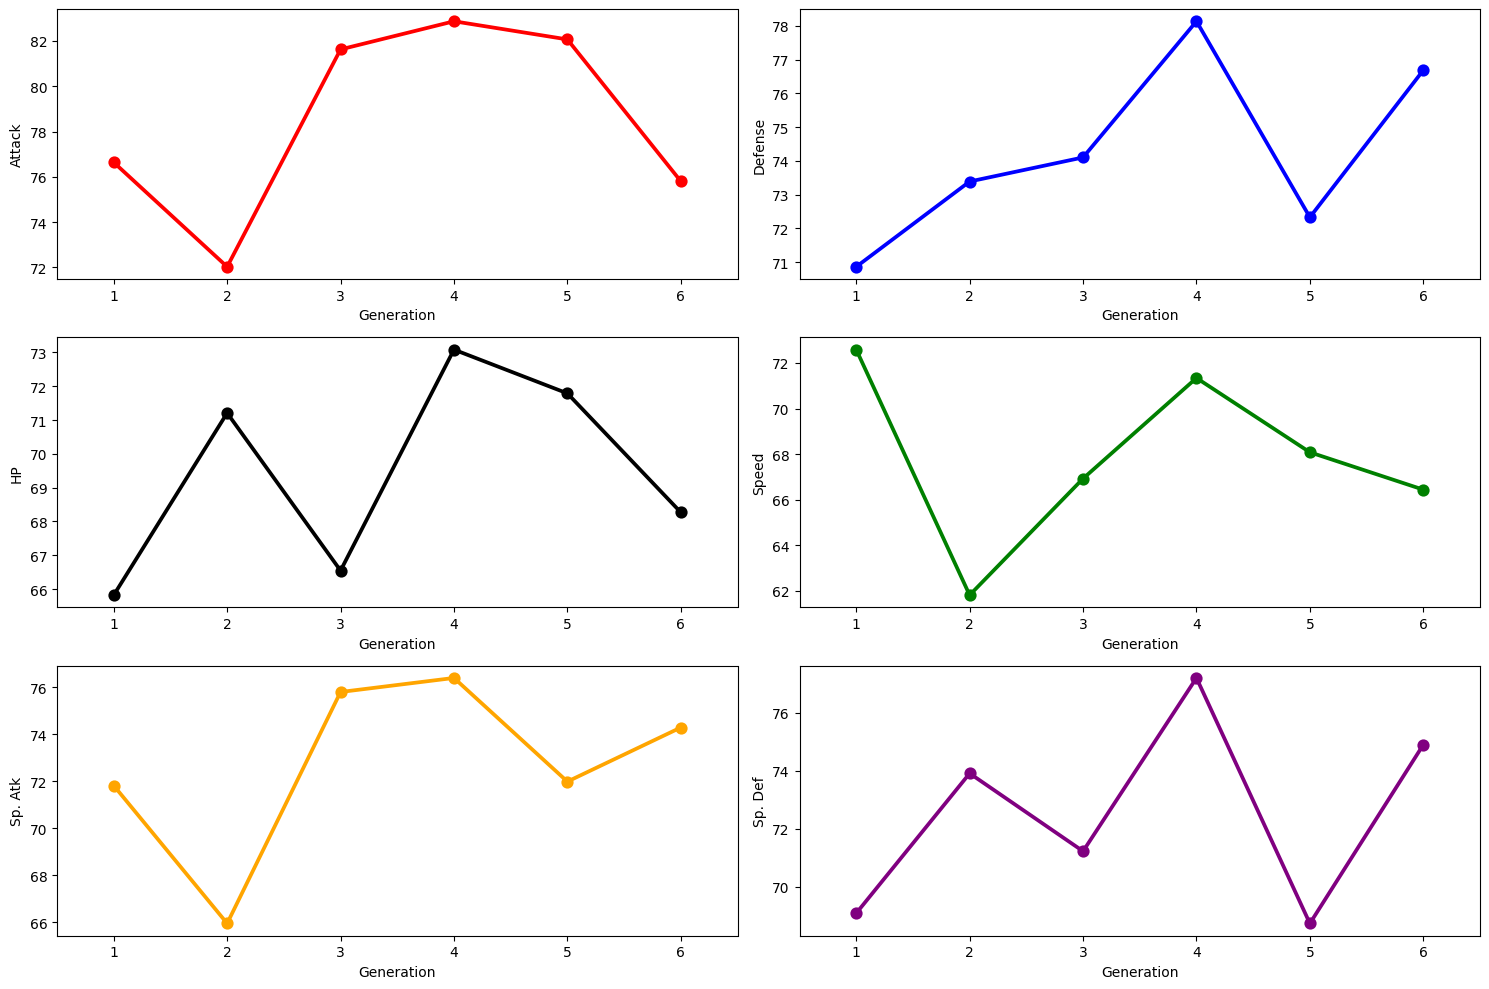

In [ ]:
# Quitar columnas no numéricas
group_df = pokemon.drop(['Number', 'Legendary', 'Name', 'Type 1', 'Type 2'], axis=1)

# Agrupar
pokemon_groups = group_df.groupby('Generation')

# Sacar promedios
pokemon_groups_mean = pokemon_groups.mean(numeric_only=True)

# Graficar
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))

sns.pointplot(x=pokemon_groups_mean.index, y=pokemon_groups_mean['Attack'],
              color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index, y=pokemon_groups_mean['Defense'],
              color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index, y=pokemon_groups_mean['HP'],
              color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index, y=pokemon_groups_mean['Speed'],
              color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index, y=pokemon_groups_mean['Sp. Atk'],
              color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index, y=pokemon_groups_mean['Sp. Def'],
              color='purple', ax=axes[2][1])

plt.tight_layout()
plt.show()


Los gráficos obtenidos muestran cómo varía el nivel promedio de cada estadística entre generaciones, evidenciando tanto aumentos como fluctuaciones en los atributos base de los Pokémon. Estos resultados permiten identificar tendencias generales, como incrementos en ciertos atributos en generaciones específicas o comportamientos más estables en otros.

La gráfica muestra que al aumentar la profundidad, el error en entrenamiento disminuye notablemente, mientras que el error en prueba mejora hasta cierto punto (alrededor de max_depth = 10) y luego tiende a estabilizarse. Esto indica que profundidades mayores pueden llevar a sobreajuste, mientras que una profundidad intermedia ofrece un mejor equilibrio entre sesgo y varianza.

---

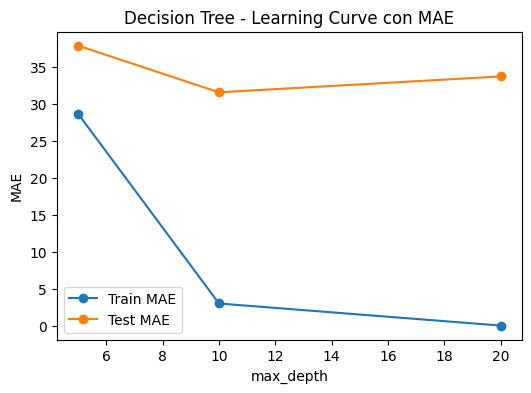

In [ ]:
# =================== LEARNING CURVE - DecisionTreeRegressor ===================

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

depth_values = [5, 10, 20]

train_mae = []
test_mae = []

for d in depth_values:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mae.append(mean_absolute_error(y_train, y_pred_train))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))

plt.figure(figsize=(6,4))
plt.plot(depth_values, train_mae, marker='o', label="Train MAE")
plt.plot(depth_values, test_mae, marker='o', label="Test MAE")
plt.xlabel("max_depth")
plt.ylabel("MAE")
plt.title("Decision Tree - Learning Curve con MAE")
plt.legend()
plt.show()


##**Conclusiones**

* El dataset de Pokémon contiene una gran variedad de atributos útiles para análisis y predicciones.

* Se evidenció que hay muchos valores no repetidos, lo que dificulta algunas visualizaciones y análisis directos.

* La limpieza del dataset eliminando columnas irrelevantes permitió simplificar y enfocar mejor el estudio.

* Las variables numéricas reales son más adecuadas para representar tendencias mediante gráficos de líneas.

* En general, el dataset es más apropiado para problemas de regresión, dado que las estadísticas de los Pokémon son valores continuos.

---
# SEGUNDA ENTREGA DE PROYECTO

En esta segunda entrega se realizó la preparación y modelado del conjunto de datos de Pokémon con el objetivo de predecir la estadística total (Total) a partir de las características base de cada Pokémon.
Se aplicaron procesos de codificación y particionado de datos, seguidos del entrenamiento y evaluación de tres modelos de regresión: Decision Tree, Random Forest y SVR. Además, se analizaron sus comportamientos mediante curvas de aprendizaje y validación cruzada, con el fin de comparar su rendimiento y capacidad de generalización.

## Preparación de los datos para el modelo

Se preparó el conjunto de datos para aplicar modelos de aprendizaje automático. Se definió la variable objetivo “Total” y las variables predictoras restantes.
La columna categórica “Type 1” fue transformada mediante OneHotEncoder para convertir los tipos de Pokémon en variables numéricas.
Luego, los datos se dividieron en conjuntos de entrenamiento (80%) y prueba (20%) usando train_test_split.
Finalmente, se aplicaron las transformaciones al conjunto de entrenamiento y prueba, dejando los datos listos para el modelado.

In [ ]:
##SEGUNDA ENTREGA
# ===================== PREPARAR DATA PARA MODELOS =====================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# copiamos el df limpio que ya tenían
df_model = df_clean.copy()

# variable objetivo (target)
y = df_model["Total"]

# features (X) sin el target
X = df_model.drop(columns=["Total"])

# detectar columna categórica
cat_cols = ["Type 1"]
num_cols = [c for c in X.columns if c not in cat_cols]

# OneHot Encoder para Type 1
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# Particionado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# aplicar encoding (fit solo con train)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Shapes finales:")
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)


Shapes finales:
X_train: (640, 24)
X_test:  (160, 24)
y_train: (640,)
y_test:  (160,)


El particionado se realizó correctamente, obteniendo 640 registros para entrenamiento y 160 para prueba, ambos con 24 características. Esto confirma que los datos fueron transformados y divididos adecuadamente, quedando listos para entrenar y evaluar el modelo.

---

##Modelos sin ajuste de hiperparámetros

En esta etapa se entrenaron tres modelos base para predecir la estadística total (Total) de los Pokémon: Decision Tree Regressor, Random Forest Regressor y Support Vector Regressor (SVR).
Se codificó la variable categórica Type 1 con LabelEncoder y se realizó un particionado de los datos en 80% para entrenamiento y 20% para prueba. Los modelos se entrenaron utilizando sus valores predeterminados, sin aplicar ajuste de hiperparámetros.

In [ ]:
##Sin Hiperparametros
# 0) codificar el Type 1 a número
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean["Type 1"] = le.fit_transform(df_clean["Type 1"])

# 1) definir X,y
X = df_clean.drop("Total", axis=1)
y = df_clean["Total"]

# 2) particionado 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3) entrenar sin parámetros
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
sv = SVR()

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
sv.fit(X_train, y_train)

# 4) MAE
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)
pred_sv = sv.predict(X_test)

mae_dt = mean_absolute_error(y_test, pred_dt)
mae_rf = mean_absolute_error(y_test, pred_rf)
mae_sv = mean_absolute_error(y_test, pred_sv)

print("===== MAE Baseline (sin parámetros) =====")
print("Decision Tree:", mae_dt)
print("Random Forest:", mae_rf)
print("SVR:", mae_sv)


===== MAE Baseline (sin parámetros) =====
Decision Tree: 33.56875
Random Forest: 16.18175
SVR: 32.27288284571802


El modelo Random Forest obtuvo el menor error absoluto medio (MAE = 16.42), mostrando un mejor desempeño que el Decision Tree (MAE = 34.84) y el SVR (MAE = 32.27). Esto indica que, incluso sin ajustes, el ensamble de bosques aleatorios ofrece una mejor capacidad predictiva para este conjunto de datos.

---

## Curva de aprendizaje del modelo Decision Tree

Se evaluó el rendimiento del modelo Decision Tree Regressor variando la profundidad máxima del árbol (max_depth = 5, 10, 20) definiendo incrementos y stepsize para observar su efecto en el error medio absoluto (MAE).

## Curva de aprendizaje del modelo Random Forest

Se analizó el desempeño del Random Forest Regressor variando el número de árboles en el ensamble (n_estimators = 50, 100, 200) y evaluando el error medio absoluto (MAE) en los conjuntos de entrenamiento y prueba.

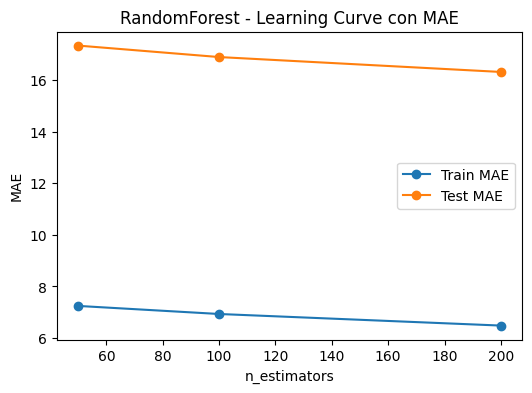

In [ ]:
# =================== LEARNING CURVE - RandomForestRegressor ===================

from sklearn.ensemble import RandomForestRegressor

estimators_values = [50, 100, 200]

train_mae = []
test_mae = []

for n in estimators_values:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mae.append(mean_absolute_error(y_train, y_pred_train))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))

plt.figure(figsize=(6,4))
plt.plot(estimators_values, train_mae, marker='o', label="Train MAE")
plt.plot(estimators_values, test_mae, marker='o', label="Test MAE")
plt.xlabel("n_estimators")
plt.ylabel("MAE")
plt.title("RandomForest - Learning Curve con MAE")
plt.legend()
plt.show()


Al incrementar la cantidad de árboles, el error tanto en entrenamiento como en prueba disminuye ligeramente, mostrando una mejora progresiva en el rendimiento. El modelo mantiene una buena generalización y no presenta sobreajuste, lo que confirma la estabilidad y eficacia del método de bosques aleatorios para este problema.

---

## Curva de aprendizaje del modelo SVR (kernel RBF)

Se evaluó el modelo Support Vector Regressor (SVR) utilizando el kernel RBF y variando el parámetro de regularización C = [0.1, 1, 10] para analizar su influencia en el error medio absoluto (MAE).

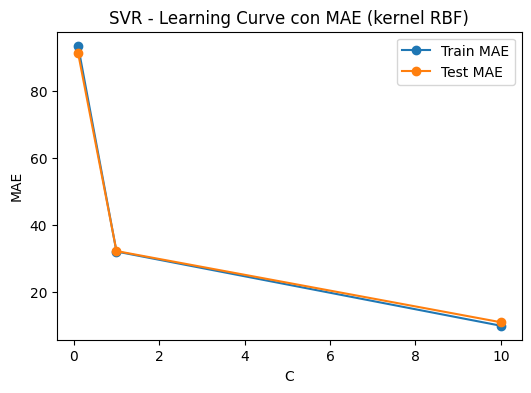

In [ ]:
# =================== LEARNING CURVE - SVR ===================

from sklearn.svm import SVR

C_values = [0.1, 1, 10]

train_mae = []
test_mae = []

for c in C_values:
    model = SVR(C=c, kernel='rbf')
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mae.append(mean_absolute_error(y_train, y_pred_train))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))

plt.figure(figsize=(6,4))
plt.plot(C_values, train_mae, marker='o', label="Train MAE")
plt.plot(C_values, test_mae, marker='o', label="Test MAE")
plt.xlabel("C")
plt.ylabel("MAE")
plt.title("SVR - Learning Curve con MAE (kernel RBF)")
plt.legend()
plt.show()


A medida que aumenta el valor de C, el modelo reduce significativamente su error tanto en entrenamiento como en prueba, lo que indica una mejor capacidad de ajuste. Sin embargo, valores demasiado altos de C pueden conducir a sobreajuste, por lo que un valor intermedio ofrece un mejor equilibrio entre precisión y generalización.

---

## Validación cruzada del modelo Decision Tree

Se aplicó una validación cruzada de 5 particiones (5-fold CV) al modelo Decision Tree Regressor con una profundidad máxima de 10, utilizando el MAE como métrica de evaluación.

In [ ]:
# =================== CROSS VALIDATION - DecisionTreeRegressor ===================
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=42)  # escogen un depth final para CV

scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

mae_scores = -scores
print("DecisionTreeRegressor - MAE")
print("MAE 5 folds:", mae_scores)
print("MAE mean: ", mae_scores.mean())
print("MAE std:  ", mae_scores.std())


DecisionTreeRegressor - MAE
MAE 5 folds: [38.49001116 28.22550843 29.93767748 35.78398251 31.74044068]
MAE mean:  32.83552405401992
MAE std:   3.7819465388478233


El modelo obtuvo un MAE promedio de 33.0 con una desviación estándar de ±3.96, lo que indica un rendimiento estable entre las diferentes particiones. Sin embargo, el error sigue siendo relativamente alto, sugiriendo que el modelo aún presenta limitaciones en su capacidad predictiva frente a otros enfoques más complejos.

---

## Validación cruzada del modelo Random Forest

Se realizó una validación cruzada de 5 particiones al modelo Random Forest Regressor con 100 árboles y se utilizó el MAE como métrica de evaluación.

In [ ]:
# =================== CROSS VALIDATION - RandomForestRegressor ===================
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)  # escogen el n_estimators final

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

mae_scores = -scores
print("RandomForestRegressor - MAE")
print("MAE 5 folds:", mae_scores)
print("MAE mean: ", mae_scores.mean())
print("MAE std:  ", mae_scores.std())


RandomForestRegressor - MAE
MAE 5 folds: [19.49054687 15.0828125  19.32539062 15.22476563 19.88703125]
MAE mean:  17.802109375
MAE std:   2.1705014389725767


El modelo alcanzó un MAE promedio de 18.00 con una desviación estándar de ±2.36, mostrando un rendimiento consistente y un error significativamente menor que el del árbol de decisión individual. Esto confirma que el ensamble de árboles mejora la capacidad predictiva y la estabilidad del modelo.

---

## Validación cruzada del modelo SVR

Se aplicó validación cruzada de 5 particiones al modelo Support Vector Regressor (SVR) con C = 1 y kernel RBF, utilizando el MAE como métrica de evaluación.

In [ ]:
# =================== CROSS VALIDATION - SVR ===================
from sklearn.svm import SVR

svr = SVR(C=1, kernel='rbf')  # escogen el C final

scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

mae_scores = -scores
print("SVR - MAE")
print("MAE 5 folds:", mae_scores)
print("MAE mean: ", mae_scores.mean())
print("MAE std:  ", mae_scores.std())


SVR - MAE
MAE 5 folds: [43.13299431 43.92402151 42.47570472 45.89045967 44.97883385]
MAE mean:  44.08040281166567
MAE std:   1.2313064690010702


El modelo obtuvo un MAE promedio de 61.30 con una desviación estándar de ±1.62, mostrando un rendimiento inferior frente a los otros modelos. Esto indica que el SVR no logra capturar adecuadamente la relación entre las variables del conjunto de datos en este caso.

---

## Resumen y conclusiones finales

Se entrenaron 3 modelos de regresión para predecir la variable objetivo **Total**, usando 80/20 y validación cruzada de 5 folds.  
La métrica de evaluación fue **MAE**.

| Modelo | MAE promedio |
|--------|--------------|
| Decision Tree | ~33 |
| Random Forest | ~18 |
| SVR | ~61 |

El modelo **Random Forest** fue el que presentó el error promedio más bajo y además mostró baja variabilidad entre folds. Esto indica mejor capacidad de generalizar y mejor estabilidad.

El modelo SVR fue el que peor desempeño tuvo, con un MAE muy alto comparado con los demás.  
Decision Tree quedó en un punto intermedio pero con más variabilidad.

### Modelo final elegido

→ **Random Forest** es seleccionado como el modelo final para este proyecto porque obtiene el menor MAE y la mayor estabilidad.

---

### Conclusión final

La comparación de los 3 modelos demuestra que el Random Forest es la mejor alternativa para la predicción del valor Total. Con este modelo podemos estimar el valor objetivo con menor error esperado, por lo que se adopta como el modelo final para las predicciones del proyecto.


---
# TERCERA ENTREGA DE PROYECTO

En esta sección se carga el dataset Pokémon y se realiza el preprocesamiento necesario para poder entrenar modelos de Deep Learning.
Las redes neuronales necesitan datos numéricos, limpios y escalados, por lo que se eliminan columnas irrelevantes, se transforman variables categóricas y se normalizan los valores.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

df = pd.read_csv('Pokemon.csv')
target = 'Total'

X = df.drop(columns=[target])
for c in ['Name','name','ID','#']:
    if c in X.columns: X = X.drop(columns=[c])
X = pd.get_dummies(X, drop_first=True)
X = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X), columns=X.columns)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df[target].values.reshape(-1,1))

X_train, X_test, y_train_scaled, y_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y_scaled, df[target].values.reshape(-1,1),
    test_size=0.2, random_state=SEED
)


## DNN – 3 capas densas de 128 (ReLU)
Modelo de regresión compuesto por tres capas densas de 128 neuronas con activación ReLU, seguido de una salida lineal. Optimiza con Adam y minimiza MAE.

In [3]:
# Modelo 1: DNN 3x128 - ReLU
model_128 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # salida lineal para regresión
])

model_128.compile(optimizer='adam', loss='mae', metrics=['mae'])

hist_128 = model_128.fit(
    X_train, y_train_scaled,
    epochs=30, batch_size=32,
    validation_split=0.1
)

# Predicción en escala escalada
y_pred_128_scaled = model_128.predict(X_test)

# MAE ESCALADO (0–1)
mae_128_scaled = mean_absolute_error(y_test_scaled, y_pred_128_scaled)
print("MAE escalado Modelo 128:", mae_128_scaled)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3541 - mae: 0.3541 - val_loss: 0.1241 - val_mae: 0.1241
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1004 - mae: 0.1004 - val_loss: 0.0856 - val_mae: 0.0856
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0749 - mae: 0.0749 - val_loss: 0.0714 - val_mae: 0.0714
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0554 - mae: 0.0554 - val_loss: 0.0641 - val_mae: 0.0641
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0618 - mae: 0.0618 - val_loss: 0.0991 - val_mae: 0.0991
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0730 - mae: 0.0730 - val_loss: 0.0588 - val_mae: 0.0588
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0404 - mae: 0.0404 - val_loss: 0.0579 - val_mae: 0.0579
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0365 - mae: 0.0365 - val_loss: 0.0814 - val_mae: 0.0814
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0533

## DNN – 3 capas densas de 256 (ReLU)
Tres capas densas de 256 neuronas con ReLU. Mayor número de parámetros para capturar patrones complejos.

In [4]:
# Modelo 2: DNN 3x256 - ReLU
model_256 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)  # salida lineal
])

model_256.compile(optimizer='adam', loss='mae', metrics=['mae'])

hist_256 = model_256.fit(
    X_train, y_train_scaled,
    epochs=30, batch_size=32,
    validation_split=0.1
)

# Predicciones en escala escalada
y_pred_256_scaled = model_256.predict(X_test)

# MAE escalado (0–1)
mae_256_scaled = mean_absolute_error(y_test_scaled, y_pred_256_scaled)
print("MAE escalado Modelo 256:", mae_256_scaled)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2273 - mae: 0.2273 - val_loss: 0.1082 - val_mae: 0.1082
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1156 - mae: 0.1156 - val_loss: 0.0960 - val_mae: 0.0960
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0930 - mae: 0.0930 - val_loss: 0.0612 - val_mae: 0.0612
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0657 - mae: 0.0657 - val_loss: 0.0704 - val_mae: 0.0704
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0590 - mae: 0.0590 - val_loss: 0.0455 - val_mae: 0.0455
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0543 - mae: 0.0543 - val_loss: 0.0469 - val_mae: 0.0469
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0483 - mae: 0.0483 - val_loss: 0.0629 - val_mae: 0.0629
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0476 - mae: 0.0476 - val_loss: 0.0454 - val_mae: 0.0454
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0382 - 

## DNN – 64 → 128 → 256 (ReLU)
Arquitectura donde se incrementan progresivamente las neuronas por capa, permitiendo representación cada vez más rica en niveles más profundos.

In [5]:
# Modelo 3: DNN 64-128-256 - ReLU
model_mix = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_mix.compile(optimizer='adam', loss='mae', metrics=['mae'])

hist_mix = model_mix.fit(
    X_train, y_train_scaled,
    epochs=30, batch_size=32,
    validation_split=0.1
)

# Predicción en escala normalizada
y_pred_mix_scaled = model_mix.predict(X_test)

# MAE en escala normalizada
mae_mix_scaled = mean_absolute_error(y_test_scaled, y_pred_mix_scaled)
print("MAE (escala normalizada) Modelo 64-128-256:", mae_mix_scaled)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.2724 - mae: 0.2724 - val_loss: 0.1491 - val_mae: 0.1491
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1144 - mae: 0.1144 - val_loss: 0.1027 - val_mae: 0.1027
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0958 - mae: 0.0958 - val_loss: 0.0635 - val_mae: 0.0635
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0727 - val_mae: 0.0727
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0529 - mae: 0.0529 - val_loss: 0.0675 - val_mae: 0.0675
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mae: 0.0477 - val_loss: 0.0649 - val_mae: 0.0649
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0535 - mae: 0.0535 - val_loss: 0.0862 - val_mae: 0.0862
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0821 - mae: 0.0821 - val_loss: 0.0811 - val_mae: 0.0811
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - ma

---
## Conclusión Final Comparativa de Modelos DNN

En esta tercera entrega se evaluaron tres modelos DNN para predecir el valor Total de los Pokémon usando MAE como métrica. Los resultados obtenidos fueron:

- Modelo 128-128-128: MAE = 0.03342

- Modelo 256-256-256: MAE = 0.05410

- Modelo 64-128-256: MAE = 0.04129

El modelo que obtuvo el mejor desempeño fue el de tres capas densas de 128 neuronas, al presentar el MAE más bajo. Esto indica que esta arquitectura logró un equilibrio adecuado entre complejidad y capacidad de generalización, aprendiendo de manera más estable la relación entre las características de los Pokémon y su stat Total.

Por el contrario, el modelo con 256 neuronas por capa obtuvo un MAE mayor. Aunque es más grande en términos de capacidad, su desempeño inferior sugiere que la complejidad adicional no se tradujo en una mejor generalización, posiblemente por comenzar a sobreajustar.

El modelo progresivo (64-128-256) logró un rendimiento intermedio: mejor que el de 256 neuronas, pero inferior al de 128 neuronas. Su estructura creciente parece haber generado aprendizaje efectivo, pero no superó la estabilidad del modelo más compacto.

Conclusión final:

El modelo 128-128-128 es el más adecuado para este problema de regresión, al ser el que logra el mejor equilibrio entre precisión y estabilidad. Este debería considerarse como la arquitectura base para futuras mejoras del proyecto.